# Word clouds

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [232]:
import pandas as pd
import numpy as np
from tqdm import trange
from PIL import Image
import io
import math

import sys
import glob
import os

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import multidict as multidict
import re

In [246]:
def headlines(search_directories = [''], filename_filter = "*"):

    # Get a list of matching files
    files = []

    for i in range(len(search_directories)):
        files.append(sorted(glob.glob(os.path.join(search_directories[i], filename_filter))))

    files = [item for items in files for item in items] # shorthand to flatten the list of lists

    # Read in files and concatenate
    data = []

    for i in trange(len(files)):
        new_frame = pd.read_csv(files[i], header=0, parse_dates=['publishedAt'])
        new_frame.columns = new_frame.columns.str.replace(".", "_")
        data.append(new_frame)

    return pd.concat(data, sort=False)

In [247]:
!ls ../datastore/processed

abc-news	  cnn	    msnbc     reuters		  the-washington-post
associated-press  fox-news  nbc-news  the-new-york-times


In [248]:
def title_wordcloud(df, title=""):
    
    text = df['title'].str.cat(sep=' ')

    stopwords = WordCloud().stopwords.copy()
    other_stop_words = ["US", "say", "says","said", "new", "amid", "former", "will"]
    for word in other_stop_words:
        stopwords.add(word)
    
    mask = np.ones((400, 400), dtype=np.int8)
    wc = WordCloud(background_color="white", max_words=1000, mask=mask, collocations=False, stopwords=stopwords)
    
    # generate word cloud
    wc.generate_from_text(text)

    # Figure
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0,0,1,1])
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(title, fontsize=24, fontweight="bold", pad=10)
    
    ## save figure
    buf = io.BytesIO()
    
    fig.savefig(
        buf,
        format='png',
        bbox_inches='tight',
        pad_inches=0.0
    )
    
    plt.close(fig)
    
    return Image.open(buf)

In [249]:
def concat_images(images, columns=2, padding=20, outname="concatted.png"):
    
    n_images = len(images)
    
    image_width, image_height = images[0].size # assumes all have the same size

    x_padding = padding
    y_padding = padding

    rows = math.ceil(n_images/columns)

    total_width = columns * image_width + (columns + 1) * padding
    total_height = rows * image_height + (rows + 1) * padding

    concat_im = Image.new('RGB', (total_width,total_height), color=(256, 256, 256))

    x_offset = x_padding
    y_offset = y_padding

    for i in range(n_images):

        # use the modulo to start or restart the row
        if i % columns == 0:
            x_offset = 0 + x_padding

        # use floor division to get the offset
        y_offset = (i // columns) * (image_height + y_padding) + y_padding

        concat_im.paste(images[i], (x_offset, y_offset))

        x_offset = x_offset + image_width + x_padding

#    concat_im.save(outname)
    
    return concat_im

In [250]:
abc = headlines(['../datastore/processed/abc-news/'], '*-2020-08-*')
fox = headlines(['../datastore/processed/fox-news/'], '*-2020-08-*')
wapo = headlines(['../datastore/processed/the-washington-post/'], '*-2020-08-*')
nbc = headlines(['../datastore/processed/nbc-news/'], '*-2020-08-*')
msnbc = headlines(['../datastore/processed/msnbc/'], '*-2020-08-*')
cnn = headlines(['../datastore/processed/cnn/'], '*-2020-08-*')
ap = headlines(['../datastore/processed/associated-press/'], '*-2020-08-*')
nyt = headlines(['../datastore/processed/the-new-york-times/'], '*-2020-08-*')

abc_wc = title_wordcloud(abc, title="ABC News")
fox_wc = title_wordcloud(fox, title="Fox News")
wapo_wc = title_wordcloud(wapo, title="The Washington Post")
nbc_wc = title_wordcloud(nbc, title="NBC News")
msnbc_wc = title_wordcloud(msnbc, title="MSNBC")
cnn_wc = title_wordcloud(cnn, title="CNN")
ap_wc = title_wordcloud(ap, title="Associated Press")
nyt_wc = title_wordcloud(nyt, title="The New York Times")

100%|██████████| 30/30 [00:00<00:00, 222.28it/s]


In [251]:
all = concat_images([ msnbc_wc, cnn_wc, wapo_wc,nyt_wc, abc_wc,  nbc_wc, ap_wc, fox_wc])

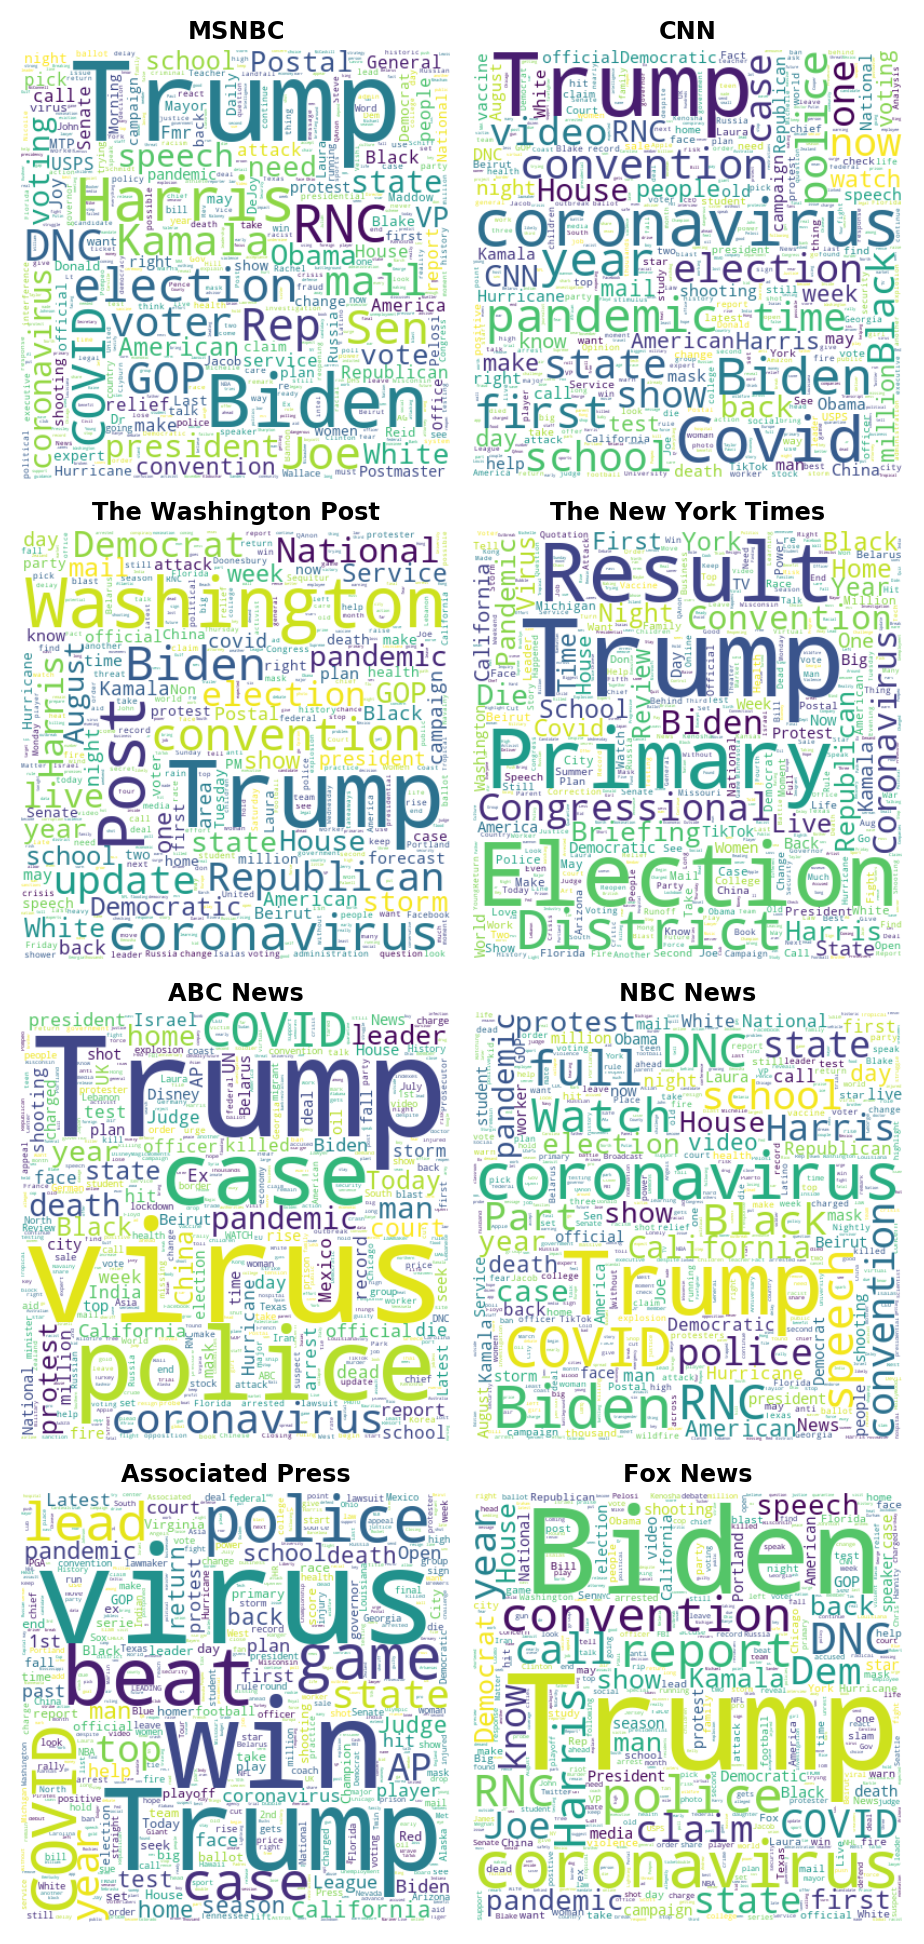

In [252]:
all

# Find frequencies

In [253]:
abc.head()

,author,title,description,url,urlToImage,publishedAt,content,source_id,source_name
0,NaN,Supreme Court allows border wall construction ...,The Supreme Court ruled 5-4 along party lines.,https://abcnews.go.com/Politics/supreme-court-...,https://s.abcnews.com/images/US/border-wall-bu...,2020-08-01 01:54:57+00:00,The Supreme Court on Friday denied a request f...,abc-news,ABC News
1,NaN,Airbnb shutters party houses in NJ amid COVID-...,Airbnb says it’s cracking down on party houses...,https://abcnews.go.com/Business/wireStory/airb...,https://s.abcnews.com/images/Business/WireAP_5...,2020-08-01 01:40:19+00:00,"TRENTON, N.J. -- \r\nAirbnb said Friday it's c...",abc-news,ABC News
2,NaN,"Midair collision kills state legislator, 6 oth...","Seven people, including an Alaska state lawmak...",https://abcnews.go.com/US/wireStory/midair-col...,https://s.abcnews.com/images/US/WireAP_f71e9ce...,2020-08-01 00:44:17+00:00,"ANCHORAGE, Alaska -- \r\nSeven people, includi...",abc-news,ABC News
3,NaN,Supreme Court won't halt challenged border wal...,The Supreme Court has declined by a 5-4 vote t...,https://abcnews.go.com/Politics/wireStory/supr...,https://s.abcnews.com/images/US/border-wall-bu...,2020-08-01 00:27:23+00:00,WASHINGTON -- \r\nThe Supreme Court declined b...,abc-news,ABC News
4,NaN,"Boy, 9, fatally shot while playing at Chicago ...",Police say a 9-year-old boy was killed when a ...,https://abcnews.go.com/US/wireStory/boy-fatall...,NaN,2020-08-01 03:30:32+00:00,CHICAGO -- \r\nA 9-year-old boy was killed Fri...,abc-news,ABC News


In [254]:
text = abc['title'].str.cat(sep=' ')

stopwords = WordCloud().stopwords.copy()
other_stop_words = ["US", "say", "says","said", "new", "amid", "former", "will"]
for word in other_stop_words:
    stopwords.add(word)
    
wc = WordCloud(background_color="white", max_words=1000, collocations=False, stopwords=stopwords)

In [255]:
theset = wc.process_text(text)
df = pd.DataFrame.from_dict(theset, orient='index', columns=['count'])

df = df.sort_values('count', ascending=False)

In [256]:
df.head(10)

,count
virus,254
Trump,251
police,212
case,158
COVID,146
coronavirus,129
pandemic,126
death,124
man,117
year,105


OK, well this is kind of interesting, to see the top words over a specific time period. But what I'd probably like to do is give a specific word, and find how many times it's been used, over time. An app would allow you to select a time period, and see all the headlines that contained that word.

1. Generate a combined DB with the headlines, source, and date
2. Function to
    1. take input selection text
    2. find all rows with a title that contains the selection
    3. groupby on date and get count per source / or percent/source, etc.

In [573]:
data = headlines(['../datastore/processed/*/'], '*-2020-*-*')

100%|██████████| 1696/1696 [00:07<00:00, 213.58it/s]


In [574]:
data = data.set_index('publishedAt', drop=True)

In [575]:
len(data)

269128

In [576]:
def ngram(data, includes=None, excludes=None, sources=None, frequency="D"):
    
    if includes is not None:
        for include_word in includes:
            data = data[data["title"].str.contains(include_word, case=False, na=False)]
        include_text = ", ".join('"' + include + '"' for include in includes)
    else:
        return

    if excludes is not None:
        for exclude_word in excludes:
            data = data[~data["title"].str.contains(exclude_word, case=False, na=False)]
            exclude_text = ", ".join('"' + exclude + '"' for exclude in excludes)
    sub_group = data.groupby(by="source_id")
    
    if len(sub_group) == 0:
        print("No results from any source.")
        return
    
    fig = plt.figure(figsize=(18,4), dpi=72)
    ax = fig.add_axes([0,0,1,1])
    
    ax.set_title(f"Includes {include_text} and excludes {exclude_text}")

    if not sources:
        sources = sub_group.groups
        
    for group in sources:
        
        try:
            group_results = sub_group.get_group(group)
        except:
            print(f"No results from {group}")
            return
        
        group_results.resample(frequency).count()['title'].plot(ax=ax, legend=True, label=group)
        
    plt.show()
    
    return sub_group

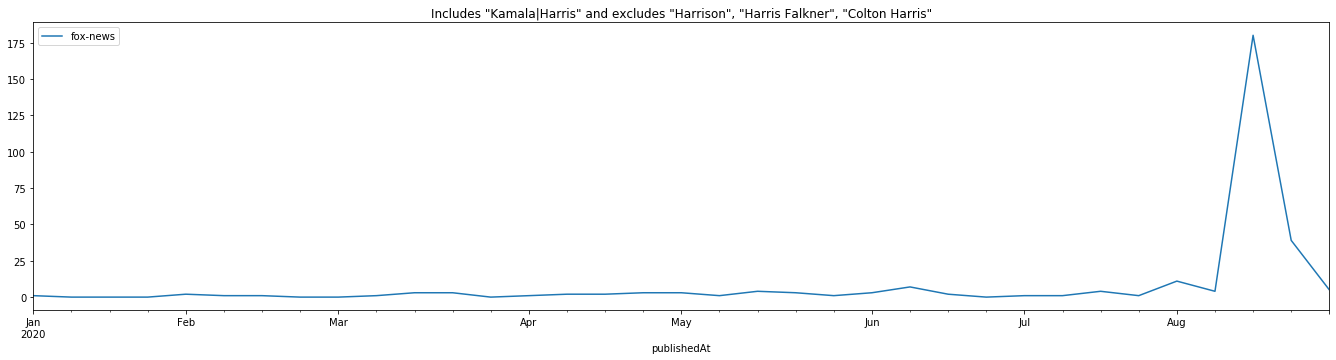

In [261]:
harris = ngram(data, includes=["Kamala|Harris"], excludes=["Harrison", "Harris Falkner", "Colton Harris"], sources=["fox-news"], frequency="W")

In [262]:
harris.get_group("fox-news").tail()

,author,title,description,url,urlToImage,content,source_id,source_name
publishedAt,,,,,,,,
2020-08-24 01:34:54+00:00,Andrew O'Reilly,Biden responds to Trump's attack on his mental...,Democratic presidential nominee Joe Biden has ...,https://www.foxnews.com/politics/biden-respond...,https://cf-images.us-east-1.prod.boltdns.net/v...,Democratic presidential nominee Joe Biden has ...,fox-news,Fox News
2020-08-24 22:01:47+00:00,Andrew O'Reilly,Biden and Harris to get tested regularly for c...,Democratic presidential nominee Joe Biden and ...,https://www.foxnews.com/politics/biden-and-har...,https://cf-images.us-east-1.prod.boltdns.net/v...,Democratic presidential nominee Joe Biden and ...,fox-news,Fox News
2020-08-26 20:30:14+00:00,Tyler Olson,Democrats say Biden-Harris is the 'strongest g...,"As the presidential election nears, interest g...",https://www.foxnews.com/politics/biden-trump-c...,https://static.foxnews.com/foxnews.com/content...,"As the presidential election nears, interest g...",fox-news,Fox News
2020-08-27 02:28:00+00:00,Brooke Singman,Iowa Sen. Joni Ernst blasts Biden-Harris ticke...,Iowa Sen. Joni Ernst on blasted the Biden-Harr...,https://www.foxnews.com/politics/iowa-sen-joni...,https://cf-images.us-east-1.prod.boltdns.net/v...,Sen. Joni Ernst on Wednesday blasted the Biden...,fox-news,Fox News
2020-08-27 22:15:54+00:00,Paul Steinhauser,"Harris charges Trump ‘froze,' was 'scared’ whe...",Democratic vice presidential nominee Sen. Kama...,https://www.foxnews.com/politics/harris-trump-...,https://cf-images.us-east-1.prod.boltdns.net/v...,Democratic vice presidential nominee Sen. Kama...,fox-news,Fox News


In [263]:
virus = ngram("virus", sources=['fox-news','associated-press', 'the-new-york-times'], frequency="W")

In [264]:
ngram("Black Lives Matter|BLM", sources=['fox-news','associated-press', 'the-new-york-times'])

Or do I want to know something like:
- date of first coverage
- how many articles covered that topic (per source)
- if a source never covered that topic

In [516]:
from bokeh.core.properties import value
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, DataRange1d, Legend
from bokeh.palettes import d3

In [266]:
output_notebook()

Loading BokehJS ...

In [308]:
def ngram2(data, includes=None, excludes=None, sources=None, frequency="D"):
    
    if includes is not None:
        for include_word in includes:
            data = data[data["title"].str.contains(include_word, case=False, na=False)]
        include_text = ", ".join('"' + include + '"' for include in includes)
    else:
        return

    if excludes is not None:
        for exclude_word in excludes:
            data = data[~data["title"].str.contains(exclude_word, case=False, na=False)]
            exclude_text = ", ".join('"' + exclude + '"' for exclude in excludes)
    sub_group = data.groupby(by="source_name")
    
    if len(sub_group) == 0:
        print("No results from any source.")
        return
    
    tooltips = [
        ('Month', '@showtime'),
        ('Count', '$y'),
        ('Source', '@source_id')
    ]
    tools = "xpan, xwheel_zoom, reset"
    
    p1 = figure(plot_width=1000, plot_height=500, x_axis_type="datetime", title=f"Includes {include_text} and excludes {exclude_text}")
    p1.add_tools(
        bokeh.models.HoverTool(
            point_policy='snap_to_data',
            line_policy='none',
            tooltips=tooltips
        )
    )
    
    colors = d3['Category10'][9]
    
    if not sources:
        sources = sub_group.groups
        
    i=0
    for group in sources:
        
        try:
            group_results = sub_group.get_group(group).copy()
        except:
            print(f"No results from {group}")
            return
        
        group_results = group_results.resample(frequency).count()
        group_results["showtime"] = group_results.index.strftime('%Y %b')
        group_results["source_id"] = group
        
        source = ColumnDataSource(group_results)
        p1.line(x="publishedAt", y="title", source=source, color=colors[i], line_width=2, legend_label=group)
        
        p1.legend.location = "top_left"
        p1.legend.click_policy="hide"
        i+=1
        
    show(p1)
    
    return sub_group

In [309]:
harris2 = ngram2(data, includes=["Kamala|Harris"], excludes=["Harrison", "Harris Falkner", "Colton Harris"], frequency="M")

In [224]:
temp = harris2.get_group("fox-news").copy()
temp['showtime'] = temp.index.strftime('%Y %b')
temp.resample("M").count()

,author,title,description,url,urlToImage,content,source.id,source.name,showtime
publishedAt,,,,,,,,,
2020-01-31 00:00:00+00:00,3,3,3,3,3,3,3,3,3
2020-02-29 00:00:00+00:00,2,2,2,2,2,2,2,2,2
2020-03-31 00:00:00+00:00,7,7,7,7,7,7,7,7,7
2020-04-30 00:00:00+00:00,10,10,10,10,7,10,10,10,10
2020-05-31 00:00:00+00:00,10,10,10,10,10,10,10,10,10
2020-06-30 00:00:00+00:00,13,13,13,13,12,13,13,13,13
2020-07-31 00:00:00+00:00,15,16,16,16,15,14,16,16,16
2020-08-31 00:00:00+00:00,205,229,225,229,229,202,229,229,229


In [204]:
temp.tail()

,author,title,description,url,urlToImage,content,source.id,source.name,showtime
publishedAt,,,,,,,,,
2020-08-24 01:34:54+00:00,Andrew O'Reilly,Biden responds to Trump's attack on his mental...,Democratic presidential nominee Joe Biden has ...,https://www.foxnews.com/politics/biden-respond...,https://cf-images.us-east-1.prod.boltdns.net/v...,Democratic presidential nominee Joe Biden has ...,fox-news,Fox News,2020 Aug
2020-08-24 22:01:47+00:00,Andrew O'Reilly,Biden and Harris to get tested regularly for c...,Democratic presidential nominee Joe Biden and ...,https://www.foxnews.com/politics/biden-and-har...,https://cf-images.us-east-1.prod.boltdns.net/v...,Democratic presidential nominee Joe Biden and ...,fox-news,Fox News,2020 Aug
2020-08-26 20:30:14+00:00,Tyler Olson,Democrats say Biden-Harris is the 'strongest g...,"As the presidential election nears, interest g...",https://www.foxnews.com/politics/biden-trump-c...,https://static.foxnews.com/foxnews.com/content...,"As the presidential election nears, interest g...",fox-news,Fox News,2020 Aug
2020-08-27 02:28:00+00:00,Brooke Singman,Iowa Sen. Joni Ernst blasts Biden-Harris ticke...,Iowa Sen. Joni Ernst on blasted the Biden-Harr...,https://www.foxnews.com/politics/iowa-sen-joni...,https://cf-images.us-east-1.prod.boltdns.net/v...,Sen. Joni Ernst on Wednesday blasted the Biden...,fox-news,Fox News,2020 Aug
2020-08-27 22:15:54+00:00,Paul Steinhauser,"Harris charges Trump ‘froze,' was 'scared’ whe...",Democratic vice presidential nominee Sen. Kama...,https://www.foxnews.com/politics/harris-trump-...,https://cf-images.us-east-1.prod.boltdns.net/v...,Democratic vice presidential nominee Sen. Kama...,fox-news,Fox News,2020 Aug


In [310]:
def ngram3(data, includes=None, excludes=None, sources=None, frequency="D"):
    
    if includes is not None:
        for include_word in includes:
            data = data[data["title"].str.contains(include_word, case=False, na=False)]
        include_text = ", ".join('"' + include + '"' for include in includes)
    else:
        return

    if excludes is not None:
        for exclude_word in excludes:
            data = data[~data["title"].str.contains(exclude_word, case=False, na=False)]
            exclude_text = ", ".join('"' + exclude + '"' for exclude in excludes)
    sub_group = data.groupby(by="source_name")
    
    if len(sub_group) == 0:
        print("No results from any source.")
        return
    
    tooltips = [
        ('Month', '@showtime'),
        ('Count', '$y'),
        ('Source', '@source_id')
    ]
    tools = "xpan, xwheel_zoom, reset"
    
    p1 = figure(plot_width=1000, plot_height=500, x_axis_type="datetime", title=f"Includes {include_text} and excludes {exclude_text}")
    p1.add_tools(
        bokeh.models.HoverTool(
            point_policy='snap_to_data',
            line_policy='none',
            tooltips=tooltips
        )
    )
    
    colors = d3['Category10'][9]
    
    if not sources:
        sources = sub_group.groups
        
    i=0
    for group in sources:
        
        try:
            group_results = sub_group.get_group(group).copy()
        except:
            print(f"No results from {group}")
            return
        
        group_results = group_results.resample(frequency).count()
        group_results["showtime"] = group_results.index.strftime('%Y %b')
        group_results["source_id"] = group
        
        source = ColumnDataSource(group_results)
        p1.line(x="publishedAt", y="title", source=source, color=colors[i], line_width=2, legend_label=group)
        
        p1.legend.location = "top_left"
        p1.legend.click_policy="hide"
        i+=1
        
    show(p1)
    
    return sub_group

In [311]:
harris2 = ngram3(data, includes=["Kamala|Harris"], excludes=["Harrison", "Harris Falkner", "Colton Harris"], frequency="M")

In [421]:
def subset_by_text(_data, includes=None, excludes=None, search_field="title"):
    """Count the number of occurrences of text in a dataframe column.
    
    Arguments:
        includes (list): a list of strings for which to search. Each string is searched
        via regex and the result is subsetted in the order they are provided.
        
        excludes (list): a list of strings to exclude. These are executed after the includes
        list, in the order they are provided, and are exclusive. E.g., to keep occurrences
        that have both a word in the includes and in the excludes, you need to devise a
        a single regex-style string and provide it via the includes list.
        
        sources (list): list of elements from source_id to include.
        
        frequency (string): passed to pandas.DataFrame.resample
        
        search_field (string): the column name to search
        
    Returns:
        (pd.DataFrame): a new dataframe containing the counts of results from each source.
    """
    if includes is not None:
        for include_word in includes:
            result = _data[_data[search_field].str.contains(include_word, case=False, na=False)].copy()
        description_text = "Result includes " + ", ".join('"' + include + '"' for include in includes)
        
    else:
        return

    if excludes is not None:
        for exclude_word in excludes:
            result = result[~result[search_field].str.contains(exclude_word, case=False, na=False)]
        
        description_text = description_text + " and excludes " + ", ".join('"' + exclude + '"' for exclude in excludes)

    result.desc = description_text
            
    return result

In [497]:
def count_by_source(_data, freq="D"):
    """Count the number of rows attribtued to each source_name."""
    
    grouper = _data.groupby([pd.Grouper(freq=freq), 'source_name'])
    time_group = grouper['title'].count().unstack('source_name').fillna(0)
    
    time_group.desc = _data.desc
    time_group.freq = freq
    
    return time_group

In [514]:
# def get_group_results():
#     sub_group = data.groupby([pd.Grouper(freq=frequency), 'source_name'])
    
#     if len(sub_group) == 0:
#         print("No results from any source.")
#         return
    
#     if not sources:
#         sources = sub_group.groups
        
#     for group in sources:
        
#         try:
#             group_results = sub_group.get_group(group).copy()
#         except:
#             print(f"No results from {group}")
#             return
        
#         group_results = group_results.resample(frequency).count()
#         group_results["showtime"] = group_results.index.strftime('%Y %b')
#         group_results["source_id"] = group
                    
#     return sub_group

In [577]:
def bokeh_bar(_counts):
    
    to_plot = _counts.copy()
    to_plot['showtime'] = to_plot.index.strftime('%B %Y')

    source = ColumnDataSource(to_plot)

    categories = list(_counts.keys())
    colors = d3['Category10'][len(categories)]

    tooltips = [
        ('Period', '@showtime'),
        ('Source', '$name'),
        ('Count', '@$name')
    ]
    tools = "xpan, xwheel_zoom, reset"

    p = figure(plot_width=900, plot_height=500, x_axis_type='datetime',
               tooltips = tooltips, tools=tools, y_range=DataRange1d(start=0),
               title=counts.desc)

    bar_width_config = {
        "M":2000000000,
        "W":500000000,
        "D":50000000
    }

    v = p.vbar_stack(categories, x='publishedAt', color=colors,
                 width=bar_width_config[_counts.freq], source=source)

    legend = Legend(items=[(x, [v[i]]) for i, x in enumerate(categories)], location=(5, 100))
    p.add_layout(legend)
    p.legend.location = "top_left"
    p.legend.border_line_color = None
    
    show(p)

In [578]:
subset = subset_by_text(data, includes=["Kamala|Harris"], excludes=["Harrison", "Harris Falkner", "Colton Harris"])
counts = count_by_source(subset, freq="W")
bokeh_bar(counts)

In [579]:
subset = subset_by_text(data, includes=["BLM|Black Lives Matter"])
counts = count_by_source(subset, freq="W")
bokeh_bar(counts)

In [587]:
subset[subset["source_id"] == "fox-news"][["title"]].iloc[0:10]

,title
publishedAt,
2020-02-12 20:11:14+00:00,Black Lives Matter leader justifies rioting in...
2020-03-02 20:58:10+00:00,Los Angeles DA apologizes after husband points...
2020-06-02 15:48:00+00:00,Evangelical leaders support Black Lives Matter
2020-06-02 15:07:00+00:00,Beauty blogger apologizes for blackface makeup...
2020-06-03 20:28:16+00:00,Black Lives Matter plans armed 'peace officers...
2020-06-04 11:54:08+00:00,"David Webb blasts Hollywood, Black Lives Matte..."
2020-06-04 15:52:54+00:00,Tomi Lahren spoke to Black Lives Matter leader...
2020-06-04 19:07:37+00:00,Colts GM Chris Ballard asks why it's 'so freak...
2020-06-04 18:41:49+00:00,Florida waitress writes uplifting 'Black Lives...


In [644]:
def print_headlines(_df):
    print(len(_df), "headlines")
    print("=============")
    for i in range(len(_df)):
        print(i, '-', _df.iloc[i].name.strftime("%b %d, %Y"), "-", _df.iloc[i].title)

In [645]:
print_headlines(subset[subset["source_id"] == "the-new-york-times"])

48 headlines
0 - May 31, 2020 - Corporate Voices Get Behind ‘Black Lives Matter’ Cause
1 - Jun 08, 2020 - BTS Fans Say They’ve Raised $1 Million for Black Lives Matter Groups
2 - Jun 09, 2020 - Poets Criticize Poetry Foundation’s Statement on Black Lives Matter
3 - Jun 09, 2020 - Poets Criticize Poetry Foundation’s Statement on Black Lives Matter
4 - Jun 09, 2020 - Dancing Bodies That Proclaim: Black Lives Matter
5 - Jun 10, 2020 - ‘Da 5 Bloods’ Review: Black Lives Mattered in Vietnam, Too
6 - Jun 10, 2020 - ‘Da 5 Bloods’ Review: Black Lives Mattered in Vietnam, Too
7 - Jun 10, 2020 - ‘Da 5 Bloods’ Review: Black Lives Mattered in Vietnam, Too
8 - Jun 10, 2020 - Premier League Captains Plan Show of Support for Black Lives Matter
9 - Jun 10, 2020 - Economics, Dominated by White Men, Is Roiled by Black Lives Matter
10 - Jun 12, 2020 - Starbucks Will Allow Employees to Wear Black Lives Matter Apparel
11 - Jun 13, 2020 - 5 Podcasts at the Intersection of Pride Month and the Black Lives Matt

In [648]:
subset[subset["source_id"] == "the-new-york-times"].iloc[5]

author                                             By A.O. Scott
title          ‘Da 5 Bloods’ Review: Black Lives Mattered in ...
description    Spike Lee’s new joint is an anguished, funny, ...
url            https://www.nytimes.com/2020/06/10/movies/da-5...
urlToImage     https://static01.nyt.com/images/2020/06/10/art...
content        Spike Lee’s career can be described as a lover...
source_id                                     the-new-york-times
source_name                                   The New York Times
Name: 2020-06-10 22:39:28+00:00, dtype: object

In [649]:
subset[subset["source_id"] == "the-new-york-times"].iloc[6]

author                                             By A.O. Scott
title          ‘Da 5 Bloods’ Review: Black Lives Mattered in ...
description    Spike Lee’s new joint is an anguished, funny, ...
url            https://www.nytimes.com/2020/06/10/movies/da-5...
urlToImage     https://static01.nyt.com/images/2020/06/10/art...
content        Spike Lee’s career can be described as a lover...
source_id                                     the-new-york-times
source_name                                   The New York Times
Name: 2020-06-10 22:39:28+00:00, dtype: object